In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
df = pd.read_csv('heart_fail_data.csv')
display(df.head(5))
print(df.shape)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


(306, 13)


In [3]:
ds = df.anaemia.value_counts().reset_index()
ds.columns = ['anaemia', 'count']
ds

,anaemia,count
0,0,173
1,1,133


<AxesSubplot:xlabel='anaemia'>

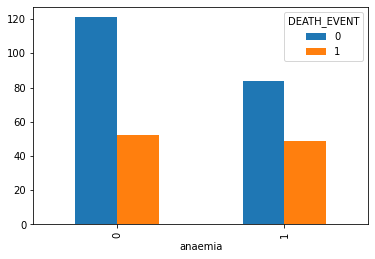

In [4]:
fig = px.bar(ds, x = 'anaemia', y = 'count', title = 'Anaemia/count', width = 500)
pd.crosstab(index=df.anaemia, columns=df.DEATH_EVENT).plot(kind = 'bar')

In [5]:
# percentage of females who died and were smoking
print('Percentage of females who have died:',df['DEATH_EVENT'][df['sex'] == 0].value_counts(normalize = True)[1]*100)
print('Percentage of the number of men who have died', df['DEATH_EVENT'][df['sex']==1].value_counts(normalize = True)[1]*100)

Percentage of females who have died: 33.33333333333333
Percentage of the number of men who have died 32.82828282828283


In [6]:
X = df.iloc[:, :-1] # input feature
y = df.iloc[:,-1] # output features
display(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
301,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29
302,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30
303,90.0,1,60,1,50,0,226000.00,1.0,134,1,0,30
304,82.0,1,855,1,50,1,321000.00,1.0,145,0,0,30


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [9]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
282,-1.569785,0,-0.572534,0,-0.683473,0,-0.479834,3.032220,-1.987606,1,1,1.533553
6,1.147501,1,-0.381291,0,-2.027649,0,-1.356792,-0.196177,0.122004,1,0,-1.527802
76,0.735791,0,-0.543112,0,2.004879,1,0.536641,-0.692853,0.825207,0,1,-0.711441
302,0.653449,0,-0.028229,1,-0.235414,0,-0.350283,2.659712,-0.581199,1,0,-1.272689
91,-0.087629,0,0.302767,1,0.660703,0,0.337332,-0.444515,-0.815600,1,0,-0.634907


## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [11]:
print(roc_auc_score(y_test, preds))
print('\n')
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test, preds))

0.8392857142857143


Confusion Matrix


[[39  3]
 [ 5 15]]


## SVM

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(roc_auc_score(y_test, preds))
print('\n')
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test, preds))

0.7523809523809525


Confusion Matrix


[[38  4]
 [ 8 12]]


## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(roc_auc_score(y_test, preds))
print('\n')
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test, preds))

0.8023809523809523


Confusion Matrix


[[38  4]
 [ 6 14]]


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 7)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
print(roc_auc_score(y_test, preds))
print('\n')
print('Confusion Matrix')
print('\n')
print(confusion_matrix(y_test, preds))

0.9130952380952381


Confusion Matrix


[[41  1]
 [ 3 17]]


- On training all the 4 models on the data, we could observe that ensembling technique such as Random forest tend to perform better on the training data.
- We could say that the Decision tree model tends to overfit on the data. 
- The random forest model produces the highest accuracy 